# Project  - Regression 

## __Classified Ads for Cars__
Something about the data which author mentioned : The scrapers were tuned slowly over the course of the year and some of the sources were completely unstructured, so as a result the data is  _dirty_ , there are missing values and some values are very obviously wrong (e.g. phone numbers scraped as mileage etc.)

There are roughly 3,5 Million rows and the data is dirty.


## Data Description 

### Link to the dataset : https://www.kaggle.com/mirosval/personal-cars-classifieds

## Importing the libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration and Data Cleaning

In [87]:
carData = pd.read_csv("all_anonymized_2015_11_2017_03.csv")

C:\Users\samip\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
carData.head(10)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.894643+00,2016-01-27 20:40:15.46361+00,1628.42
6,skoda,fabia,167220.0,2001.0,1400.0,74.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.915376+00,2016-01-27 20:40:15.46361+00,2072.54
7,bmw,NaN,148500.0,2009.0,2000.0,130.0,NaN,NaN,None,auto,5,5,diesel,2015-11-14 18:10:06.924123+00,2016-01-27 20:40:15.46361+00,10547.74
8,skoda,octavia,105389.0,2003.0,1900.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.936239+00,2016-01-27 20:40:15.46361+00,4293.12
9,NaN,NaN,301381.0,2002.0,1900.0,88.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.954319+00,2016-01-27 20:40:15.46361+00,1332.35


In [89]:
carData.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [90]:
carData = carData.drop(columns =['model','color_slug', 'stk_year'])

In [91]:
carData['date_created'] = carData['date_created'].str.slice(0, 10)
carData['date_last_seen'] = carData['date_last_seen'].str.slice(0, 10)

In [92]:
carData = carData[carData['body_type'].notna()]
carData = carData[carData['fuel_type'].notna()]

In [93]:
carData['body_type'].value_counts()

compact         241948
other           122159
coupe            68738
stationwagon     68092
van              30728
offroad          21835
sedan            19149
convertible       5303
transporter       4440
Name: body_type, dtype: int64

In [94]:
carData['seat_count'].value_counts()

None     237765
5.0      160410
5         13172
0.0       11322
7.0        9805
4.0        9043
4          6372
3.0        4346
2.0        3841
2          2869
7          2467
3          1729
9.0        1721
6.0        1517
8.0         886
6           462
9           380
1.0         190
8           156
1            11
21.0          9
50.0          5
14.0          5
18.0          4
57            4
51.0          4
29.0          3
52.0          3
17.0          3
16.0          3
15.0          3
81.0          3
44.0          2
13.0          2
32.0          2
33.0          2
36.0          2
49.0          2
53.0          2
17            2
55.0          2
57.0          2
58.0          2
512.0         2
10.0          1
517.0         1
30.0          1
19.0          1
23.0          1
25.0          1
515.0         1
43.0          1
54.0          1
59.0          1
85.0          1
138.0         1
45.0          1
Name: seat_count, dtype: int64

In [95]:
carData['door_count'].value_counts()

None    233523
5.0     160334
4.0      17846
5        13231
3.0       9338
0.0       7668
2         7290
4         7053
3         4242
2.0       3839
6.0        229
1.0         89
6           41
7.0         15
55.0         9
1            8
58.0         2
9.0          2
8.0          2
49.0         1
45.0         1
17.0         1
7            1
22.0         1
Name: door_count, dtype: int64

_drop all the None values_

In [96]:
carData = carData[carData['seat_count'] != 'None']
carData = carData[carData['door_count'] != 'None']

_convert everything to numeric_ 

_Also dropping seat count values greater than 9 and door count values greater than 7_

In [97]:
carData[['seat_count', 'door_count']] = carData[['seat_count', 'door_count']].apply(pd.to_numeric)
carData = carData[carData['seat_count'] <= 9] #drop values greater than 9
carData['seat_count'] = carData['seat_count'].astype(np.int64)
carData = carData[carData['door_count'] <= 7] #drop values greater than 7
carData['door_count'] = carData['door_count'].astype(np.int64)

In [98]:
carData['seat_count'].value_counts().sort_index()

0      8629
1       198
2      5095
3      5251
4     15148
5    170986
6      1893
7     12023
8       991
9      2018
Name: seat_count, dtype: int64

Text(0.5, 1.0, 'Car Seat Counts')

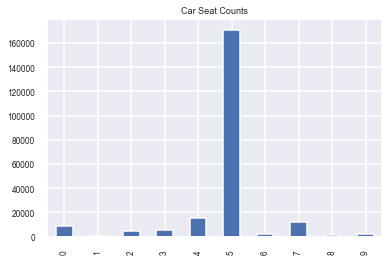

In [99]:
carData['seat_count'].value_counts().sort_index().plot(kind ='bar')
plt.title("Car Seat Counts")

In [100]:
carData['door_count'].value_counts().sort_index()

0      7653
1        85
2     10010
3     12587
4     23968
5    167650
6       264
7        15
Name: door_count, dtype: int64

Text(0.5, 1.0, 'Car Door Counts')

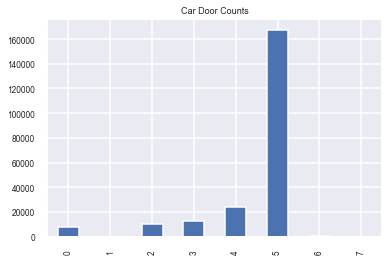

In [101]:
carData['door_count'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Car Door Counts")

In [102]:
carData['maker'] = carData['maker'].fillna(carData['maker'].mode()[0])
carData['transmission'] = carData['transmission'].fillna(carData['transmission'].mode()[0])

carData['manufacture_year'] = carData['manufacture_year'].fillna(carData['manufacture_year'].mode()[0])
carData['manufacture_year'] = carData['manufacture_year'].astype(np.int64)

carData = carData[carData['mileage'] != 0] # remove cars without any mileage
carData['mileage'] = carData['mileage'].fillna(carData['mileage'].mean())
carData['mileage (log)'] = np.log(carData['mileage'])
carData = carData.drop(columns=['mileage'])

carData['engine_displacement'] = carData['engine_displacement'].fillna(carData['engine_displacement'].mean())
carData['engine_power'] = carData['engine_power'].fillna(carData['engine_power'].mean())
carData['engine_displacement (log)'] = np.log(carData['engine_displacement'])
carData = carData.drop(columns=['engine_displacement'])

Text(0.5, 1.0, 'Automatic and Manual Car Counts')

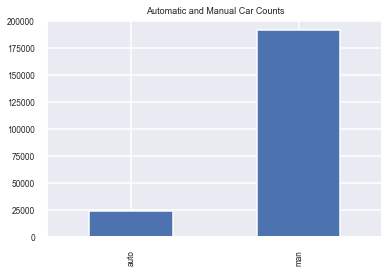

In [103]:
carData['transmission'].value_counts().sort_index().plot(kind ='bar')
plt.title("Automatic and Manual Car Counts")

In [104]:
carData[['date_created','date_last_seen']] = carData[['date_created','date_last_seen']].apply(pd.to_datetime)
carData['ad_day_count'] = (carData['date_last_seen'] - carData['date_created']).dt.days
carData = carData.drop(columns =['date_created','date_last_seen'])

In [105]:
carData.isnull().sum()

maker                        0
manufacture_year             0
engine_power                 0
body_type                    0
transmission                 0
door_count                   0
seat_count                   0
fuel_type                    0
price_eur                    0
mileage (log)                0
engine_displacement (log)    0
ad_day_count                 0
dtype: int64

In [106]:
carData.head(10)

,maker,manufacture_year,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,mileage (log),engine_displacement (log),ad_day_count
507,mercedes-benz,2011,120.0,van,man,5,5,diesel,22168.76,12.223878,7.669962,74
577,skoda,2007,96.0,van,man,5,9,diesel,8475.20,12.409013,7.808323,74
583,skoda,2005,128.0,van,man,5,8,diesel,9215.40,12.421184,7.808323,74
898,ford,2011,103.0,van,man,5,5,diesel,9437.45,11.830040,7.600902,74
972,skoda,2016,79.0,van,man,5,5,diesel,4441.15,12.055250,7.599401,74
1007,hyundai,2002,90.0,van,man,5,5,gasoline,1073.28,12.111762,7.492760,74
1038,skoda,2016,55.0,van,man,3,2,diesel,5162.84,11.716307,7.286876,74
1079,chrysler,2012,214.0,van,auto,5,7,gasoline,18467.80,11.718312,8.189800,74
1320,skoda,2004,96.0,van,man,4,6,diesel,8845.30,11.957611,7.824046,74
1603,fiat,2006,77.0,van,man,4,5,diesel,3515.91,11.955192,7.554859,74


In [107]:
carData = pd.concat([carData,pd.get_dummies(carData.maker)],axis="columns")
carData = carData.drop(columns=['maker'])

In [108]:
carData = carData.drop(columns=['manufacture_year'])

In [109]:
carData = pd.concat([carData,pd.get_dummies(carData.body_type)],axis="columns")
carData = carData.drop(columns=['body_type'])

In [110]:
carData['transmission'] = carData['transmission'].map( {'man': 1, 'auto': 0} ).astype(int)

In [111]:
carData = pd.concat([carData,pd.get_dummies(carData.door_count,prefix='door_count')],axis="columns")
carData = carData.drop(columns=['door_count'])

In [112]:
carData = pd.concat([carData,pd.get_dummies(carData.seat_count,prefix='seat_count')],axis="columns")
carData = carData.drop(columns=['seat_count'])

In [113]:
carData = pd.concat([carData,pd.get_dummies(carData.fuel_type)],axis="columns")
carData = carData.drop(columns=['fuel_type'])

In [114]:
carData.head(10)

,engine_power,transmission,price_eur,mileage (log),engine_displacement (log),ad_day_count,alfa-romeo,aston-martin,audi,bentley,...,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,cng,diesel,electric,gasoline,lpg
507,120.0,1,22168.76,12.223878,7.669962,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
577,96.0,1,8475.20,12.409013,7.808323,74,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
583,128.0,1,9215.40,12.421184,7.808323,74,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
898,103.0,1,9437.45,11.830040,7.600902,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
972,79.0,1,4441.15,12.055250,7.599401,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1007,90.0,1,1073.28,12.111762,7.492760,74,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1038,55.0,1,5162.84,11.716307,7.286876,74,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1079,214.0,0,18467.80,11.718312,8.189800,74,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1320,96.0,1,8845.30,11.957611,7.824046,74,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1603,77.0,1,3515.91,11.955192,7.554859,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [115]:
carData.shape

(215738, 84)

In [116]:
carDataSample = carData.sample(n = 25000, random_state=0)
carDataSample = carDataSample.loc[:, (carDataSample != 0).any(axis=0)]

In [117]:
#regress sample
X = carDataSample.loc[:, carDataSample.columns != 'price_eur']
y = np.log(carDataSample['price_eur'])

# Regression Algorithms

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [119]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

<b>Linear Regression</b>

In [120]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.4f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lr.score(X_test, y_test)))

y_predlr = lr.predict(X_test)
print("R^2: ", r2_score(y_test, y_predlr))

lr.coef_: [ 2.15539664e-02 -7.51886096e-02 -7.81256333e-02 -2.14251269e-02
  1.22674714e-01  5.00604348e+11  5.64399131e+10  1.40750995e+12
  1.78435834e+11  1.61588769e+12  6.13746242e+11  3.90536767e+11
  1.57034424e+12  5.16134103e+11  3.13992628e+11  1.27027446e+12
  2.17379339e+12  6.65325987e+11  1.49302079e+11  1.36569417e+12
  5.64399131e+10  1.38230553e+11  3.42980835e+11  4.71340478e+11
  9.53700762e+11  7.98159620e+10  2.82018891e+11  5.73993259e+11
  2.52279039e+11  5.64399131e+10  8.84697006e+11  1.50086375e+12
  5.51593176e+11  6.55822921e+11  8.35964895e+11  1.64686549e+12
  1.62035721e+12  5.19183333e+11  1.55824028e+12  5.64399131e+10
  2.58502189e+11  1.00560138e+12  3.46178291e+12  5.31202049e+11
  5.54443753e+11  7.02014358e+11  5.64399131e+10  1.05912490e+12
  2.38886911e+12  9.25751310e+11 -7.69110258e+11 -5.58446252e+11
 -1.80379873e+12 -1.12232986e+12 -8.68559827e+11 -1.09019143e+12
 -1.80496018e+12 -4.64913698e+11 -1.30008797e+12  1.06397927e+12
  1.53495623e+1

<b>Lasso Regression</b>

In [121]:
from sklearn.linear_model import Lasso

lasso_params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
lasso_reg = Lasso()

lasso = GridSearchCV(lasso_reg,lasso_params,cv=2,return_train_score=True)
lasso.fit(X_train,y_train)

print(lasso.cv_results_)
print(lasso.best_estimator_)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

y_pred_lasso = lasso.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_lasso))

C:\Users\samip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.64780583084348, tolerance: 0.4981476945266166
  positive)
C:\Users\samip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.126842182873816, tolerance: 0.4918917331247469
  positive)


{'mean_fit_time': array([0.90506661, 0.14701092, 0.06350589, 0.04250479, 0.03900552]), 'std_fit_time': array([0.02100098, 0.00800049, 0.0095017 , 0.00150132, 0.00100112]), 'mean_score_time': array([0.00450051, 0.00350022, 0.00299883, 0.00249875, 0.00349784]), 'std_score_time': array([5.00082970e-04, 4.99963760e-04, 9.53674316e-07, 4.98890877e-04,
       4.99010086e-04]), 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}], 'split0_test_score': array([ 4.91439174e-01,  4.92299615e-01,  4.87489876e-01,  3.35825963e-01,
       -1.01362112e-05]), 'split1_test_score': array([ 4.93375979e-01,  4.94400977e-01,  4.94609780e-01,  3.50109979e-01,
       -1.00089162e-05]), 'mean_test_score': array([ 4.92407577e-01,  4.93350296e-01,  4.91049828e-01,  3.42967971e-01,
       -1.00725637e-05]

<b>Ridge Regression</b>

In [122]:
from  sklearn.linear_model import Ridge

ridge_params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
ridge_reg = Ridge()


ridge = GridSearchCV(ridge_reg,ridge_params,cv=2,return_train_score=True)
ridge.fit(X_train,y_train)

print(ridge.cv_results_)
print(ridge.best_estimator_)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

y_pred_ridge = ridge.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_ridge))

{'mean_fit_time': array([0.05623555, 0.04550278, 0.04250395, 0.05550432, 0.04250312]), 'std_fit_time': array([0.00176907, 0.00050008, 0.00250089, 0.00850034, 0.00150013]), 'mean_score_time': array([0.00400126, 0.00250101, 0.00299931, 0.00400007, 0.00250006]), 'std_score_time': array([8.34465027e-07, 5.00679016e-04, 1.19209290e-06, 1.00004673e-03,
       5.00202179e-04]), 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}], 'split0_test_score': array([0.49131932, 0.49131932, 0.49131935, 0.49131961, 0.49132219]), 'split1_test_score': array([0.49323045, 0.49323045, 0.49323049, 0.49323087, 0.49323465]), 'mean_test_score': array([0.49227488, 0.49227489, 0.49227492, 0.49227524, 0.49227842]), 'std_test_score': array([0.00095557, 0.00095557, 0.00095557, 0.00095563, 0.00095623]), 'rank_

<b>Polynomial Regression</b>

In [123]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr.fit(X_train_poly, y_train)

print("Train score: {:.4f}".format(lr.score(X_train_poly, y_train)))
print("Test score: {:.4f}".format(lr.score(X_test_poly, y_test)))

Train score: 0.5048
Test score: 0.4948


<b>KNN Regressor</b>

In [124]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {'n_neighbors':[41, 43, 45, 47, 49],
              'p': [1]}
knn_reg = KNeighborsRegressor()

knn = GridSearchCV(knn_reg,knn_params,cv=2,return_train_score=True)
knn.fit(X, y)

print(knn.cv_results_)
print(knn.best_estimator_)
print('Train score: {:.4f}'.format(knn.score(X_train,y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test,y_test)))

y_pred_knn = knn.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_knn))

{'mean_fit_time': array([0.07650423, 0.08500493, 0.06600475, 0.07150519, 0.09250784]), 'std_fit_time': array([0.00450015, 0.03200185, 0.01300097, 0.017501  , 0.02650118]), 'mean_score_time': array([1.94064438, 1.94814479, 1.97264636, 1.97614765, 2.10365522]), 'std_score_time': array([0.10250795, 0.07600629, 0.02150214, 0.02100182, 0.0585047 ]), 'param_n_neighbors': masked_array(data=[41, 43, 45, 47, 49],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_p': masked_array(data=[1, 1, 1, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 41, 'p': 1}, {'n_neighbors': 43, 'p': 1}, {'n_neighbors': 45, 'p': 1}, {'n_neighbors': 47, 'p': 1}, {'n_neighbors': 49, 'p': 1}], 'split0_test_score': array([0.46468999, 0.46186829, 0.45842452, 0.45461722, 0.45140837]), 'split1_test_score': array([0.46637075, 0.46261393, 0.45860461, 0.45515418, 0.45234337]),

<b>Simple SVM</b>

In [125]:
from sklearn.svm import SVR, LinearSVR

svm_simple_params = {'C':[0.01,0.1,1,10,100],
                     'epsilon':[0.01,0.1,1,10,100]
                    }

svm_simple_reg = LinearSVR()
svm_simple = GridSearchCV(estimator=svm_simple_reg,param_grid=svm_simple_params,cv=2,return_train_score=True)

svm_simple.fit(X, y)

print(svm_simple.cv_results_)
print(svm_simple.best_estimator_)
print('Train score: {:.4f}'.format(svm_simple.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svm_simple.score(X_test,y_test)))

y_pred_svm_simple = svm_simple.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_svm_simple))

C:\Users\samip\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\samip\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\samip\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\samip\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\samip\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

{'mean_fit_time': array([0.93656957, 0.88907599, 0.78355038, 0.02950382, 0.01950109,
       1.07307827, 0.94707012, 0.83756268, 0.03450179, 0.01999819,
       0.96057081, 0.97707379, 0.86857378, 0.02900302, 0.01949513,
       1.2640928 , 1.4381063 , 0.96457708, 0.03050244, 0.02050066,
       0.9960742 , 0.99908388, 0.80105078, 0.04500341, 0.03000116]), 'std_fit_time': array([5.75009584e-02, 2.59928703e-02, 3.94929647e-02, 8.50081444e-03,
       4.99129295e-04, 1.18004203e-01, 2.20022202e-02, 3.55039835e-02,
       9.49764252e-03, 9.99569893e-04, 7.50088692e-03, 2.00068951e-03,
       1.15102530e-02, 7.00199604e-03, 4.89592552e-04, 6.00135326e-03,
       3.80027294e-02, 2.74914503e-02, 4.50003147e-03, 5.01155853e-04,
       4.59849834e-02, 2.70110369e-02, 3.99005413e-03, 3.99971008e-03,
       2.38418579e-07]), 'mean_score_time': array([0.00799894, 0.00749886, 0.00799918, 0.00749981, 0.00750089,
       0.00799906, 0.00800085, 0.00800192, 0.00750113, 0.0070014 ,
       0.00750005, 0.0079

C:\Users\samip\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<b>SVM with kernels</b>

In [126]:
svm_rbf_params = {'C':[1,10,100],
                  'gamma':[.01,.1,1],
                  'kernel':['rbf']
                 }

svm_rbf_reg = SVR()
svm_rbf = GridSearchCV(svm_rbf_reg,svm_rbf_params,cv=2,return_train_score=True)

svm_rbf.fit(X, y)

print(svm_rbf.cv_results_)
print(svm_rbf.best_estimator_)
print('Train score: {:.4f}'.format(svm_rbf.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svm_rbf.score(X_test,y_test)))

y_pred_svm_rbf = svm_rbf.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_svm_rbf))

{'mean_fit_time': array([  4.64584267,  12.71543145,  84.75917053,   9.2623148 ,
        32.98444533, 105.34165668,  44.02501833,  39.13953662,
       106.4748857 ]), 'std_fit_time': array([ 0.16951191,  0.27952909,  1.35000324,  0.27765131,  0.27300763,
        7.84320974,  1.22885597,  3.97691751, 10.86782646]), 'mean_score_time': array([ 2.74021161,  6.40467894, 16.31169462,  3.51125908,  7.05102026,
       16.43271351,  4.37782264,  7.08301258, 17.51729524]), 'std_score_time': array([0.02799141, 0.02381265, 0.02549195, 0.11500883, 0.04150307,
       0.05850387, 0.0695045 , 0.13452101, 1.04907763]), 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1, 0.01, 0.1, 1, 0.01, 0.1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   

In [127]:
'''
svm_poly_params = {'C':[1,10,100],
                  'gamma':[.01,.1,1],
                  'kernel':['poly']
                 }

svm_poly_reg = SVR()
svm_poly = GridSearchCV(svm_poly_reg,svm_poly_params,cv=2,return_train_score=True,n_jobs=-1)

svm_poly.fit(X, y)

print(svm_poly.cv_results_)
print(svm_poly.best_estimator_)
print('Train score: {:.4f}'.format(svm_poly.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svm_poly.score(X_test,y_test)))

y_pred_svm_poly = svm_poly.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_svm_poly))
'''

'\nsvm_poly_params = {\'C\':[1,10,100],\n                  \'gamma\':[.01,.1,1],\n                  \'kernel\':[\'poly\']\n                 }\n\nsvm_poly_reg = SVR()\nsvm_poly = GridSearchCV(svm_poly_reg,svm_poly_params,cv=2,return_train_score=True,n_jobs=-1)\n\nsvm_poly.fit(X, y)\n\nprint(svm_poly.cv_results_)\nprint(svm_poly.best_estimator_)\nprint(\'Train score: {:.4f}\'.format(svm_poly.score(X_train,y_train)))\nprint(\'Test score: {:.4f}\'.format(svm_poly.score(X_test,y_test)))\n\ny_pred_svm_poly = svm_poly.predict(X_test)\nprint("R^2: ", r2_score(y_test, y_pred_svm_poly))\n'

In [128]:
'''
svm_linear_params = {'C':[1,10,100],
                     'gamma':[.01,.1,1],
                     'kernel':['linear']
                    }

svm_linear_reg = SVR()
svm_linear = GridSearchCV(svm_linear_reg,svm_linear_params,cv=2,return_train_score=True,n_jobs=-1)

svm_linear.fit(X, y)

print(svm_linear.cv_results_)
print(svm_linear.best_estimator_)
print('Train score: {:.4f}'.format(svm_linear.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svm_linear.score(X_test,y_test)))

y_pred_svm_linear = svm_linear.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred_svm_linear))
'''

'\nsvm_linear_params = {\'C\':[1,10,100],\n                     \'gamma\':[.01,.1,1],\n                     \'kernel\':[\'linear\']\n                    }\n\nsvm_linear_reg = SVR()\nsvm_linear = GridSearchCV(svm_linear_reg,svm_linear_params,cv=2,return_train_score=True,n_jobs=-1)\n\nsvm_linear.fit(X, y)\n\nprint(svm_linear.cv_results_)\nprint(svm_linear.best_estimator_)\nprint(\'Train score: {:.4f}\'.format(svm_linear.score(X_train,y_train)))\nprint(\'Test score: {:.4f}\'.format(svm_linear.score(X_test,y_test)))\n\ny_pred_svm_linear = svm_linear.predict(X_test)\nprint("R^2: ", r2_score(y_test, y_pred_svm_linear))\n'

# Decision Tree Regressor

In [129]:
param_grid_dtr={'criterion':["mse", "friedman_mse", "mae"],
               'max_depth':[1,2,3,4,5]}
print(" Parameter grid for Decision Tree Regressor is: {}".format(param_grid_dtr))

 Parameter grid for Decision Tree Regressor is: {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_depth': [1, 2, 3, 4, 5]}


In [130]:
grid_search_dtr=GridSearchCV(DecisionTreeRegressor(),param_grid_dtr,scoring='r2',return_train_score=True,n_jobs=-1,refit='r2')

In [131]:
grid_search_dtr.fit(X_train,y_train)

C:\Users\samip\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit='r2', return_train_score=True,
        

In [132]:
print("Best parameters: {}".format(grid_search_dtr.best_params_))
print("Best r2 score: {:.2f}".format(grid_search_dtr.best_score_))

Best parameters: {'criterion': 'mse', 'max_depth': 5}
Best r2 score: 0.60


# Conclusion

<b> We are getting best R^2 value(0.60) from Decision Tree Regression.So we can say that Decision tree works well in this scenario. 
Moreover, The ridge regression model works the best for the regressing data as It had a training score of 0.5048, and a test set score of 0.4948. The R^2 value was 0.4947714169929378. </b>